In [20]:
import numpy as np
from sklearn.decomposition import PCA
import phate


def compute_PCA():
    #snp_matrix = np.loadtxt("PS2/ps2/ps2_pca.genotypes.tab")
    snp_matrix = np.loadtxt("stripped_chr22.genotypes.tab")
    snp_matrix = np.transpose(snp_matrix)
    pca = PCA(n_components=2)
    snp_pca = pca.fit_transform(snp_matrix)
    np.savetxt("PS2/ps2/ps2_pca.projection.txt", snp_pca, fmt='%.5f')
    

def compute_Phate():
    #snp_matrix = np.loadtxt("PS2/ps2/ps2_pca.genotypes.tab")
    snp_matrix = np.loadtxt("stripped_chr22.genotypes.tab")
    snp_matrix = np.transpose(snp_matrix)
    phate_op = phate.PHATE(k=4, t=10, n_jobs=-2)
    snp_phate = phate_op.fit_transform(snp_matrix)
    np.savetxt("ps2_phate.projection.txt", snp_phate, fmt='%.5f')


#compute_PCA()
compute_Phate()

Calculating PHATE...
  Running PHATE on 2504 observations and 500000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3344.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.99 seconds.
    Calculating affinities...
    Calculated affinities in 0.40 seconds.
  Calculated graph and diffusion operator in 3346.04 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 48.20 seconds.
    Calculating KMeans...
    Calculated KMeans in 1105.13 seconds.
  Calculated landmark operator in 1155.70 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 93.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 14.56 seconds.
Calculated PHATE in 4609.44 seconds.


Populating the interactive namespace from numpy and matplotlib


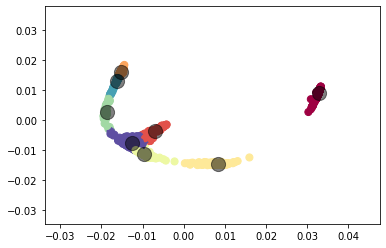

In [4]:
%pylab inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

#snp_data = np.loadtxt("PS2/ps2/ps2_pca.projection.txt")
snp_data = np.loadtxt("../ps2_phate.projection.txt")

kmeans = KMeans()
kmeans.fit(snp_data)
y_kmeans = kmeans.predict(snp_data)

plt.scatter(snp_data[:, 0], snp_data[:, 1], c=y_kmeans, s=50, cmap="Spectral")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Populating the interactive namespace from numpy and matplotlib


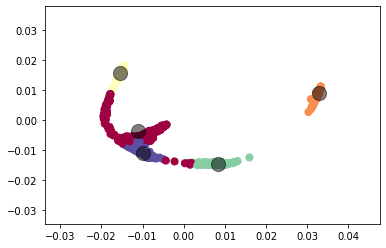

In [3]:
%pylab inline
from sklearn.mixture import GaussianMixture

#snp_data = np.loadtxt("PS2/ps2/ps2_pca.projection.txt")
snp_data = np.loadtxt("../ps2_phate.projection.txt")

gmm = GaussianMixture(n_components=5)
gmm.fit(snp_data)
y_gmm = gmm.predict(snp_data)

plt.scatter(snp_data[:, 0], snp_data[:, 1], c=y_gmm, s=50, cmap="Spectral")
means = gmm.means_
plt.scatter(means[:, 0], means[:, 1], c='black', s=200, alpha=0.5)

Populating the interactive namespace from numpy and matplotlib


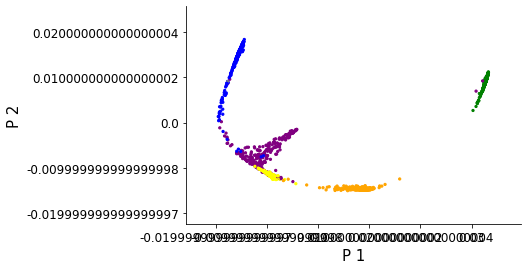

In [26]:
%pylab inline
import os

sample_to_pop = {}
with open("ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"YRI": "blue", "LWK": "blue", "GWD": "blue", 
                "MSL": "blue", "ESN": "blue", "ACB": "blue", "ASW": "blue",  
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green", "KHV": "green",
                "CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
                "GIH": "orange", "BEB": "orange", "ITU": "orange", "PJL": "orange", "STU": "orange",
                "None": "gray"    
               }

samples = [item.strip() for item in open(os.path.join("PS2/ps2/", "ps2_pca.samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
    

snp_data = np.transpose(snp_data)
p1 = snp_data[0]
p2 = snp_data[1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(p1, p2, color=colors, s=5)
ax.set_xlabel("P 1", size=15)
ax.set_ylabel("P 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();    